In [86]:
# libs

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pyod.models.knn import KNN

In [87]:
# Dataset

data = pd.read_csv('houses_to_rent.csv')
data.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [88]:
print(f"O DataFrame possui {data.shape[0]} registros e {data.shape[1]} colunas.")

O DataFrame possui 10692 registros e 13 colunas.


In [89]:
# visualizando as colunas

data.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
      dtype='object')

In [90]:
# renomeando as colunas

data.rename(columns={'hoa (R$)':'hoa', 'rent amount (R$)':'rent',
       'property tax (R$)': 'property_tax', 'fire insurance (R$)':'fire_insurance', 'total (R$)':'total'}, inplace=True)

In [91]:
data.dtypes

city              object
area               int64
rooms              int64
bathroom           int64
parking spaces     int64
floor             object
animal            object
furniture         object
hoa                int64
rent               int64
property_tax       int64
fire_insurance     int64
total              int64
dtype: object

In [92]:
# transformando algumas colunas em string

selecionados = ['area', 'rooms', 'bathroom', 'parking spaces']

for coluna in selecionados:
    data[coluna] = data[coluna].astype(str)

In [93]:
data.dtypes

city              object
area              object
rooms             object
bathroom          object
parking spaces    object
floor             object
animal            object
furniture         object
hoa                int64
rent               int64
property_tax       int64
fire_insurance     int64
total              int64
dtype: object

In [94]:
# visualizando dados nulos

data.isnull().sum()

print("Não há ocorrencia de dados nulos")

Não há ocorrencia de dados nulos


In [95]:
# verificando dados duplicados

data.duplicated().sum()

358

In [96]:
# removendo dados duplicados

data.drop_duplicates(inplace=True)

In [97]:
# verificando a remoção de duplicados

data.duplicated().sum()

0

In [98]:
# após a remoção dos dados duplicados

data.shape

(10334, 13)

## Identificando outliers

In [99]:
# removendo a variavel target
df = data.iloc[:,8:14]
df.head()

,hoa,rent,property_tax,fire_insurance,total
0,2065,3300,211,42,5618
1,1200,4960,1750,63,7973
2,1000,2800,0,41,3841
3,270,1112,22,17,1421
4,0,800,25,11,836


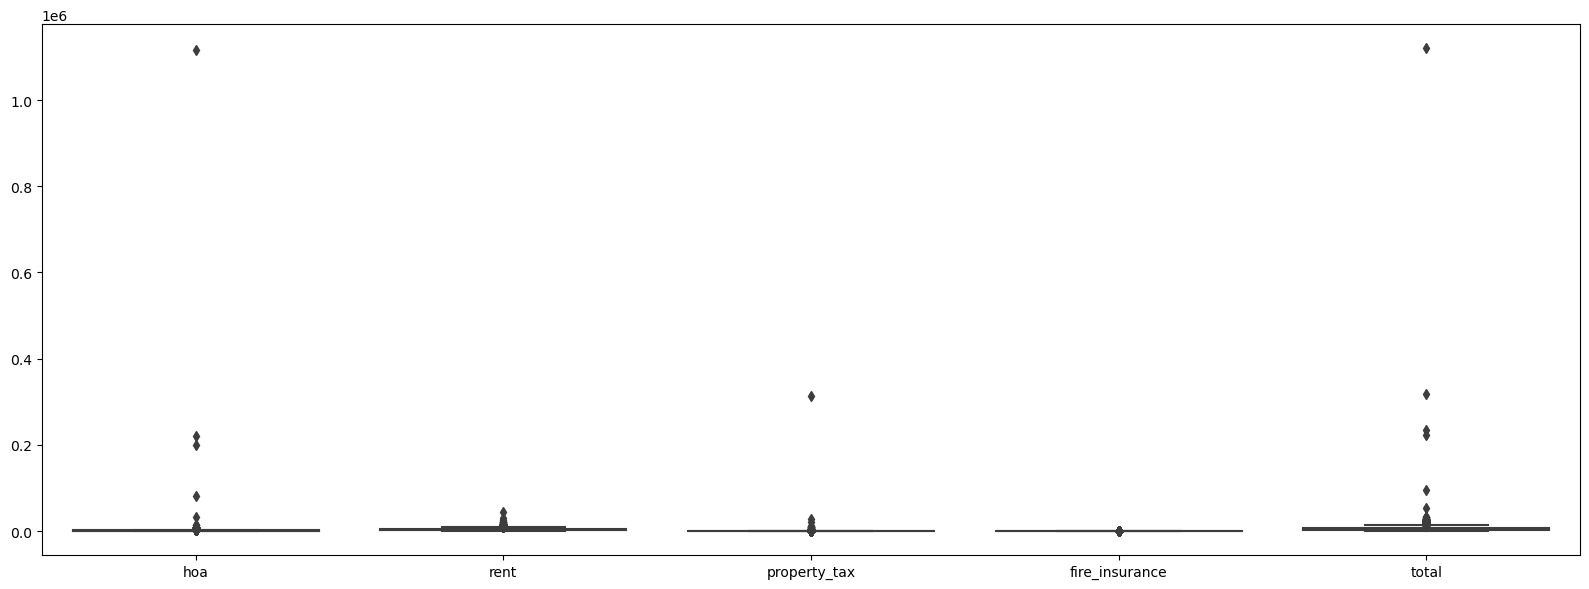

In [100]:
plt.figure(figsize=(16,6))
ax = sns.boxplot(data = df)

hoa : int64
rent : int64
property_tax : int64
fire_insurance : int64
total : int64


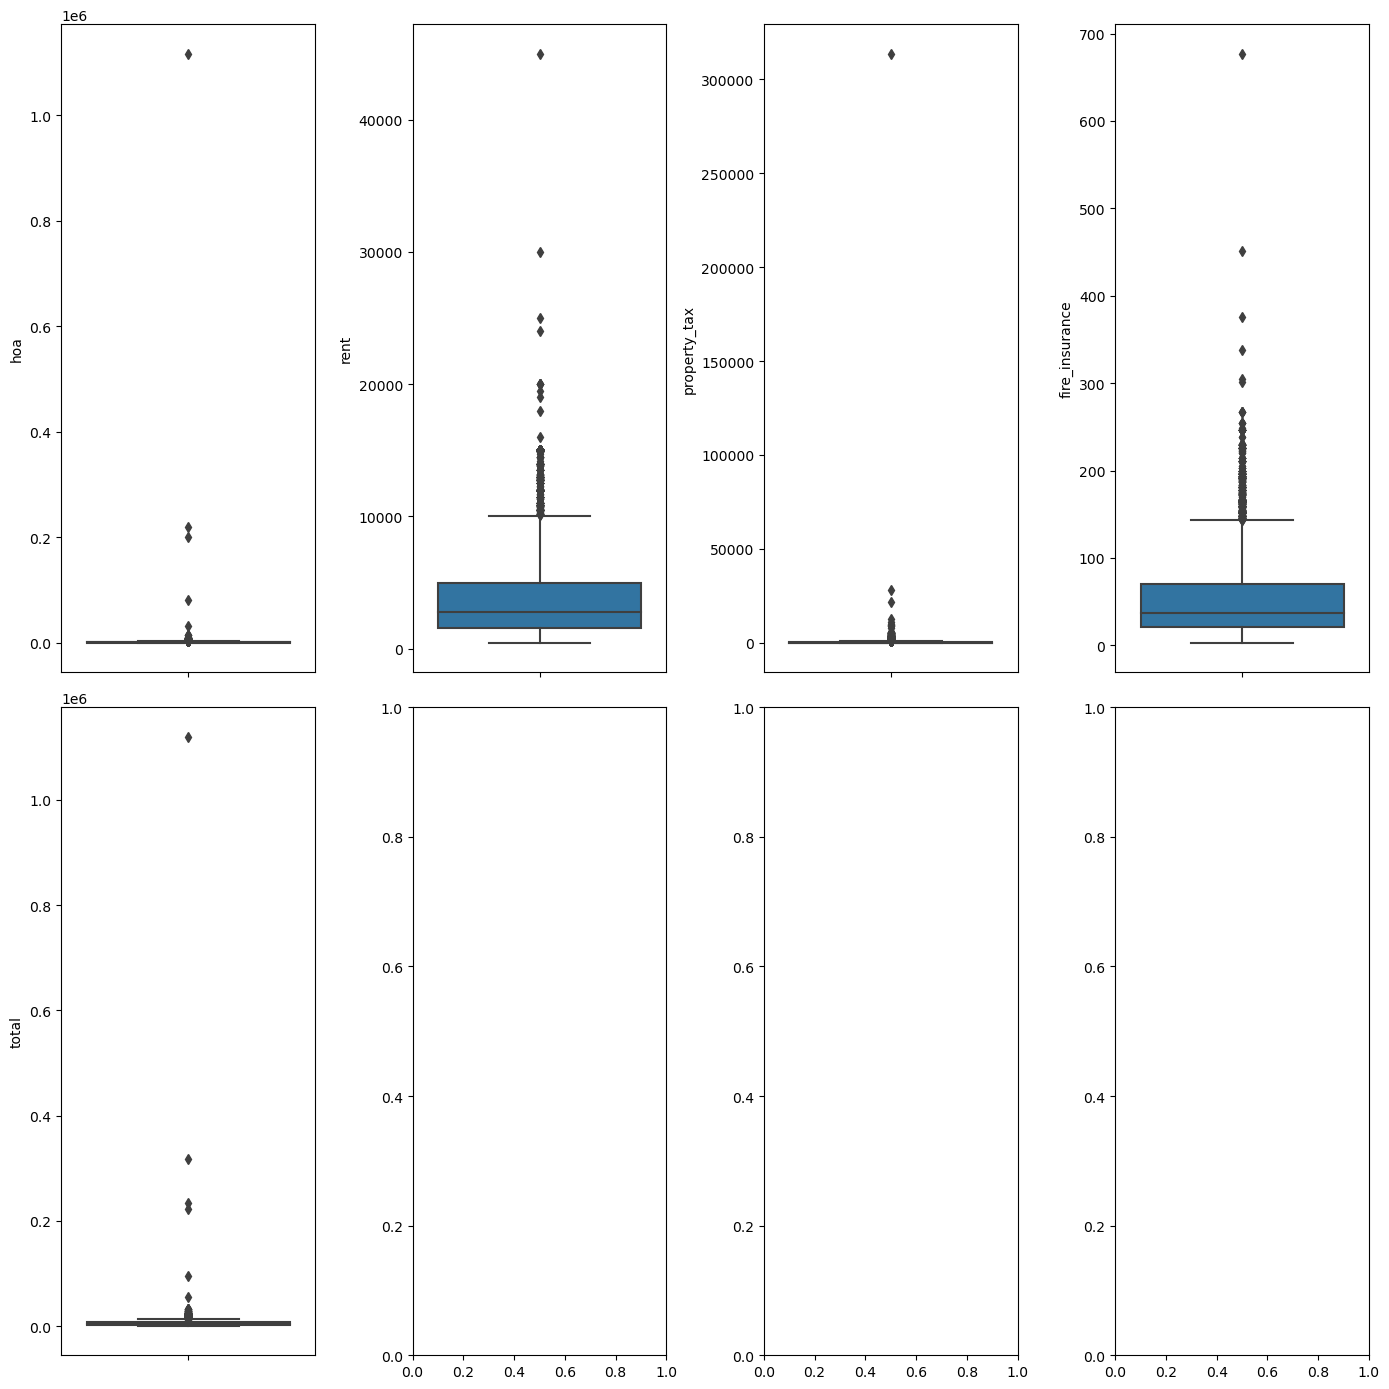

In [101]:
numeric_variables = []
for i in df.columns[0:13].tolist():
    if df.dtypes[i] == 'int64' or df.dtypes[i] == 'float64':
        print(i, ':', df.dtypes[i])
        numeric_variables.append(i)
plt.rcParams['figure.figsize'] = [14.00, 14.00]
plt.rcParams['figure.autolayout'] = True

plt.rcParams['font.size'] = 10
plt.rcParams['axes.titlesize'] = 20

f, axes = plt.subplots(2,4) # 2 linhas e 4 colunas

line = 0
column = 0

for i in numeric_variables:
    sns.boxplot(data = df, y=i, ax=axes[line][column])
    column +=1
    if column == 4:
        line += 1
        column = 0
plt.show()

In [102]:
# instanciando o objeto KNN
detector = KNN()

# treinando um detector de Outliers
detector.fit(df)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [103]:
# labels_ retorno um array com 0 e 1
# 0 nao é outlier e 1 é outlier

predictions = detector.labels_
predictions

array([0, 1, 0, ..., 0, 1, 0])

In [104]:
# contagem para identificar oss outliers

np.unique(predictions, return_counts=True)

(array([0, 1]), array([9300, 1034], dtype=int64))

In [105]:
# observando o calculo da distancia realizado para identificar outlier

trust_prediction = detector.decision_scores_
trust_prediction

array([ 234.95105873, 1005.547612  ,  141.5344481 , ...,  187.48333259,
        502.86081573,   95.53009997])

In [106]:
# criando lista somente com os outliers
outliers = []

for i in range(len(predictions)):
    if predictions[i] == 1:
        outliers.append(i)

In [107]:
list_outliers = data.iloc[outliers,:]
list_outliers

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent,property_tax,fire_insurance,total
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
7,São Paulo,213,4,4,4,4,acept,not furnished,2254,3223,1735,41,7253
8,São Paulo,152,2,2,1,3,acept,furnished,1000,15000,250,191,16440
19,São Paulo,600,4,5,6,-,acept,not furnished,0,12000,9500,181,21680
40,São Paulo,300,4,6,4,20,acept,not furnished,3700,12000,1584,153,17440
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,São Paulo,141,3,5,0,4,acept,not furnished,909,10140,772,129,11950
10681,São Paulo,230,3,5,3,3,not acept,not furnished,3800,11000,1100,140,16040
10683,São Paulo,280,4,4,2,5,acept,not furnished,4200,4000,1042,51,9293
10686,São Paulo,150,3,3,2,8,not acept,furnished,0,13500,0,172,13670


In [108]:
list_outliers.shape

(1034, 13)

In [109]:
data.shape

(10334, 13)

In [110]:
# concatenando 'data' e 'lista_outliers' 
#criei uma duplicação dos dados
df = pd.concat([data,list_outliers])
df.shape

(11368, 13)

In [111]:
# removendo outliers do dataframe com drop_duplicates
# using method keep=False
df = df.drop_duplicates(keep=False)
df.shape

(9300, 13)

### Variável "City"

In [112]:
# cidades

df["city"].value_counts().sort_values(ascending=False)

city
São Paulo         4879
Rio de Janeiro    1348
Belo Horizonte    1153
Porto Alegre      1126
Campinas           794
Name: count, dtype: int64

In [113]:
# percentual de casa por cidade

city_counts = df['city'].value_counts()
city_percentagens = city_counts / len(df) * 100
city_percentagens.sort_values(ascending=False).round(1).map("{:.1f}%".format)

city
São Paulo         52.5%
Rio de Janeiro    14.5%
Belo Horizonte    12.4%
Porto Alegre      12.1%
Campinas           8.5%
Name: count, dtype: object

Text(0.5, 1.0, 'Count City')

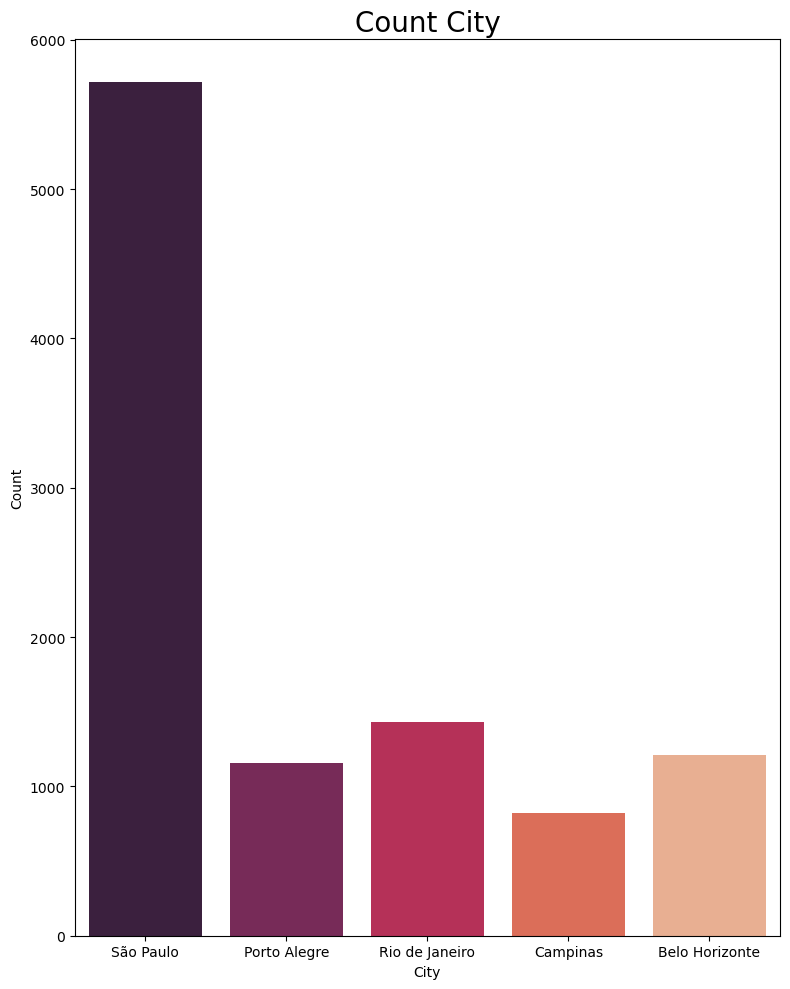

In [144]:
# numero de casas para alugar por cidade

plt.figure(figsize=(8,10))
sns.countplot(data=data, x=data['city'], palette="rocket")
plt.ylabel('Count')
plt.xlabel('City')
plt.title('Count City')

In [115]:
# preço médio de aluguel por cidade 

df.groupby('city')['rent'].median().sort_values(ascending=False)

city
São Paulo         3000.0
Rio de Janeiro    2300.0
Belo Horizonte    2250.0
Porto Alegre      1600.0
Campinas          1500.0
Name: rent, dtype: float64

In [116]:
# valor de aluguel que mais se repete por cidade

df.groupby('city')['rent'].apply(lambda x: x.mode().iloc[0]).sort_values(ascending=False)

city
Porto Alegre      2500
Rio de Janeiro    2500
São Paulo         2500
Campinas          1200
Belo Horizonte    1100
Name: rent, dtype: int64

Text(0.5, 1.0, 'City x Rent')

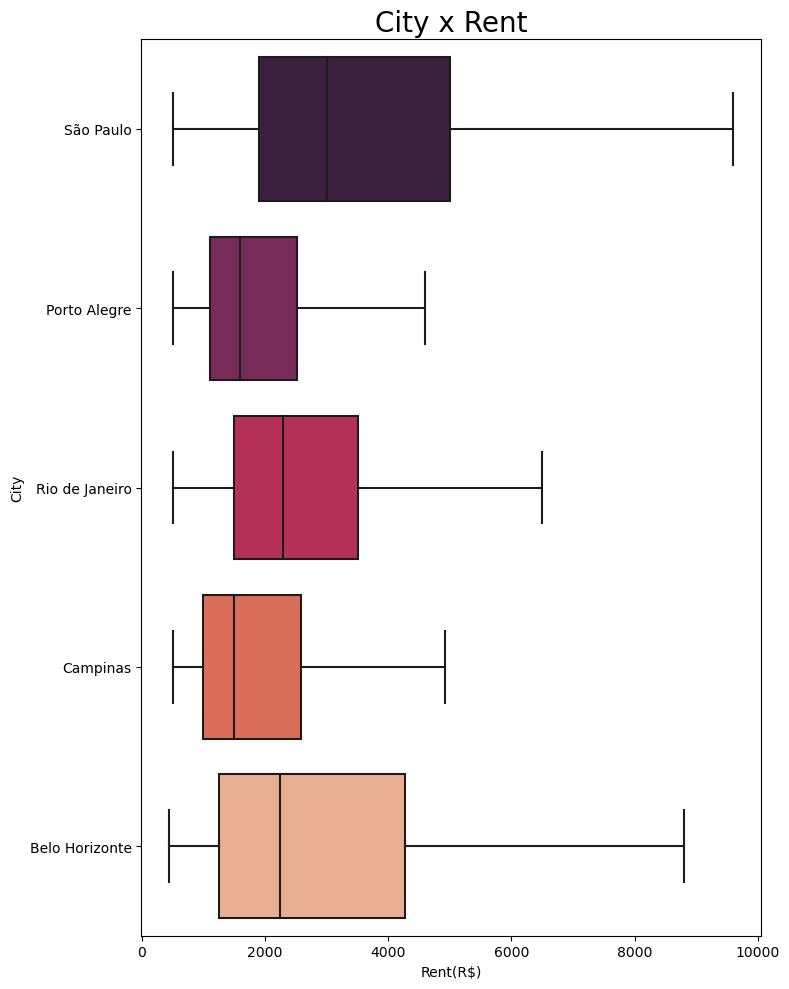

In [137]:
plt.figure(figsize=(8,10))
sns.boxplot(y=df['city'], x=df['rent'],showfliers=False, palette="rocket")
plt.ylabel('City')
plt.xlabel('Rent(R$)')
plt.title('City x Rent')

### Variável "animal"

In [117]:
# verificando a variavel animal

df['animal'].value_counts().sort_values(ascending=False)

animal
acept        7219
not acept    2081
Name: count, dtype: int64

In [118]:
# percentual de aceitação de aniamis

animal_counts = df['animal'].value_counts()
animal_percentagens = animal_counts / len(df) * 100
animal_percentagens.sort_values(ascending=False).round(1).map("{:.1f}%".format)

animal
acept        77.6%
not acept    22.4%
Name: count, dtype: object

In [119]:
# media de preço onde possui e nao possui animais

df.groupby('animal')['rent'].median().sort_values()

animal
not acept    2230.0
acept        2500.0
Name: rent, dtype: float64

In [120]:
df.groupby('animal')['city'].value_counts()

animal     city          
acept      São Paulo         3678
           Rio de Janeiro    1079
           Porto Alegre       966
           Belo Horizonte     857
           Campinas           639
not acept  São Paulo         1201
           Belo Horizonte     296
           Rio de Janeiro     269
           Porto Alegre       160
           Campinas           155
Name: count, dtype: int64

### Variável "furniture"

In [121]:
# verificando a variável "furniture"

df['furniture'].value_counts(ascending=False)

furniture
not furnished    7121
furnished        2179
Name: count, dtype: int64

In [122]:
furniture_counts = df['furniture'].value_counts()
furniture_percentagens = furniture_counts / len(df) * 100
furniture_percentagens.sort_values(ascending=False).round(1).map("{:.1f}%".format)

furniture
not furnished    76.6%
furnished        23.4%
Name: count, dtype: object

- o dataset utilizado possui apenas registros de 5 cidades: São Paulo, Rio de Janeiro, Porto Alegre, Belo Horizonte, e Campinas;
- São Paulo possui mais casas disponiveis para alugar(52%). Deve-se levar em consideração que existem muito mais imóveis situados em São Paulo no DataFrame, constituindo mais de 50% dos dados;
- 77% dos imóveis aceitam animais;
- São Paulo é a cidade que mais aceita animais;
- a média de preço não varia de forma significativa por aceitar animais ou não;
- 76% dos imóveis não são mobiliados;